# Orders

In [1]:
# Auto reload imported module every time a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

In [4]:
# What datasets do we have access to now ? 
data.keys()

dict_keys(['product_category_name_translation', 'products', 'order_reviews', 'sellers', 'order_payments', 'customers', 'geolocation', 'order_items', 'orders'])

In [5]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(orders.shape == (99441, 8))

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
# Turn date fields into datetime type

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [9]:
orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

In [10]:
# Compute just the number of days in each time_delta 
one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (24 hours)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta

In [11]:
def handle_delay(x):
    if x > 0:
        return x
    else:
        return 0

orders.loc[:,'delay_vs_expected'] = \
    orders['delay_vs_expected'].apply(handle_delay)

In [12]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected', 'order_status']].head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered


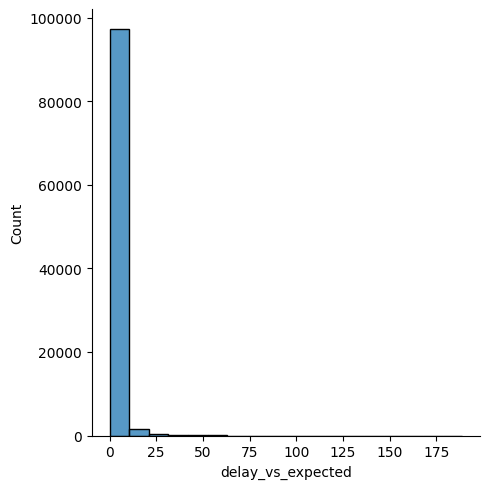

In [13]:
sns.displot(orders['delay_vs_expected'])

In [14]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


In [16]:
# Get a copy of reviews dataframe

reviews = data['order_reviews'].copy()
assert(reviews.shape == (99224,7))

In [17]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
# Get dim_is_one_star, dim_is_five_star, review_score

reviews['dim_is_one_star'] = reviews['review_score'].apply(lambda x: 1 if x == 1 else 0)
reviews['dim_is_five_star'] = reviews['review_score'].apply(lambda x: 1 if x == 5 else 0)

In [19]:
# Final dataset

reviews = reviews[['order_id', 'dim_is_one_star', 'dim_is_five_star', 'review_score']]

In [20]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_one_star,dim_is_five_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,0,1,5
2,f9e4b658b201a9f2ecdecbb34bed034b,0,1,5
3,658677c97b385a9be170737859d3511b,0,1,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,0,1,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,0,1,5
99220,22ec9f0669f784db00fa86d035cf8602,0,1,5
99221,55d4004744368f5571d1f590031933e4,0,1,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [22]:
# Get a copy of items dataframe
items = data['order_items'].copy()

In [23]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
# Get the total number of products per order
items = items.groupby('order_id', as_index=False).agg({'order_item_id': 'count'})

In [25]:
items.columns = ['order_id', 'number_of_products']

In [26]:
items

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [27]:
Order().get_number_products()

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [30]:
# Get a copy of items dataframe
items = data['order_items'].copy()

In [31]:
# Get the total number of sellers per order
items = items.groupby('order_id', as_index=False).agg({'seller_id': 'nunique'})

In [32]:
# Rename column
items.columns = ['order_id', 'number_of_sellers']

In [34]:
# Get a co  py of items dataframe
items_02 = data['order_items'].copy()

In [35]:
items_02.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [36]:
# Check all columns type
items_02.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [37]:
# Check order_id duplicates
items_02['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

In [38]:
# Groupby order_id and sum all numerical columns
items_02 = items_02.groupby('order_id', as_index=False).sum()

In [39]:
# Get a dataframe with only the relevant columns
items_02 = items_02[['order_id', 'price', 'freight_value']]

In [41]:
# Get 5 different dataframes: orders, order_items, sellers, customers, geolocation
orders = data['orders'].copy()
order_items = data['order_items'].copy()
sellers = data['sellers'].copy()
customers = data['customers'].copy()
geolocation = data['geolocation'].copy()

In [42]:
# Get only the relevant columnns in each dataframe
orders = orders[['order_id', 'customer_id']]
order_items = order_items[['order_id', 'seller_id']]
sellers = sellers[['seller_id', 'seller_zip_code_prefix']]
customers = customers[['customer_id', 'customer_zip_code_prefix']]
geolocation = geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

In [43]:
# One zip code can be linked to multiple lat/lng coordinates, so merge and give only the first lat/lng
geolocation = geolocation.groupby('geolocation_zip_code_prefix', as_index=False).first()

In [44]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1002,-23.548318,-46.635421
2,1003,-23.549032,-46.635313
3,1004,-23.550116,-46.635122
4,1005,-23.549819,-46.635606
...,...,...,...
19010,99960,-27.953797,-52.029641
19011,99965,-28.173892,-52.038447
19012,99970,-28.345143,-51.876926
19013,99980,-28.389218,-51.846012


In [45]:
# Create 2 dataframes, one merging customers and geolocation, the other merging sellers and geolocation
customers_geo = customers.merge(geolocation, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
sellers_geo = sellers.merge(geolocation, how='left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [46]:
sellers

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


In [47]:
customers

,customer_id,customer_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409
1,18955e83d337fd6b2def6b18a428ac77,9790
2,4e7b3e00288586ebd08712fdd0374a03,1151
3,b2b6027bc5c5109e529d4dc6358b12c3,8775
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937
99437,e7b71a9017aa05c9a7fd292d714858e8,6764
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115
99439,56b18e2166679b8a959d72dd06da27f9,92120


In [48]:
# Remove geolocation_zip_code_prefix column and rename geolocation_lat and geolocation_lng
customers_geo = customers_geo.drop(columns=['geolocation_zip_code_prefix'])
customers_geo = customers_geo.rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'})
sellers_geo = sellers_geo.drop(columns=['geolocation_zip_code_prefix'])
sellers_geo = sellers_geo.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'})

In [49]:
customers_geo

,customer_id,customer_zip_code_prefix,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,9790,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,1151,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,-22.987222,-47.151073
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,-23.587901,-46.501830
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,92120,-29.956391,-51.167614


In [50]:
# Merge orders and customers, then orders and order_items, then orders and sellers
orders = orders.merge(customers, on='customer_id')
orders = orders.merge(order_items, on='order_id')
orders = orders.merge(sellers, on='seller_id')

In [51]:
# Merge orders with customers_geo and sellers_geo
orders = orders.merge(customers_geo, on='customer_id')\
    .merge(sellers_geo, on='seller_id', suffixes=('_customer', '_seller'))

In [52]:
# Check if there are any null values
orders.isnull().sum()

order_id                             0
customer_id                          0
customer_zip_code_prefix_x           0
seller_id                            0
seller_zip_code_prefix_customer      0
customer_zip_code_prefix_y           0
customer_lat                       302
customer_lng                       302
seller_zip_code_prefix_seller        0
seller_lat                         253
seller_lng                         253
dtype: int64

In [53]:
# Drop null values
orders = orders.dropna()

In [54]:
orders.mean()

/tmp/ipykernel_89006/1925993400.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  orders.mean()


customer_zip_code_prefix_x         35041.234629
seller_zip_code_prefix_customer    24446.856293
customer_zip_code_prefix_y         35041.234629
customer_lat                         -21.234221
customer_lng                         -46.202366
seller_zip_code_prefix_seller      24446.856293
seller_lat                           -22.801450
seller_lng                           -47.236718
dtype: float64

In [55]:
from olist.utils import haversine_distance

In [56]:
# Create a new column with the distance between customer and seller
orders.loc[:, 'distance_seller_customer'] =\
    orders.apply(lambda row:
        haversine_distance(row['seller_lng'],row['seller_lat'],row['customer_lng'],row['customer_lat']),axis=1)

In [57]:
orders.mean()

/tmp/ipykernel_89006/1925993400.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  orders.mean()


customer_zip_code_prefix_x         35041.234629
seller_zip_code_prefix_customer    24446.856293
customer_zip_code_prefix_y         35041.234629
customer_lat                         -21.234221
customer_lng                         -46.202366
seller_zip_code_prefix_seller      24446.856293
seller_lat                           -22.801450
seller_lng                           -47.236718
distance_seller_customer             597.187869
dtype: float64

In [58]:
# Create a dataframe "distance" with only order_id and distance_seller_customer
distance = orders[['order_id', 'distance_seller_customer']]

In [59]:
# Groupby order_id and get the mean distance_seller_customer, since an order can have multiple items, and rename the column
distance = distance.groupby('order_id', as_index=False).agg({'distance_seller_customer':'mean'})
distance = distance.rename(columns={'distance_seller_customer': 'average_distance_sellers_customer'})

In [60]:
distance.mean()

/tmp/ipykernel_89006/934261635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  distance.mean()


average_distance_sellers_customer    601.961534
dtype: float64

In [61]:
# Average distance between sellers and customers
distance['average_distance_sellers_customer'].mean()

601.9615336539032

In [62]:
# YOUR CODE HERE